# Loan Predictor

For this project, I would use data from Kaggle regarding Loan Predicting on this link.

https://www.kaggle.com/chiragc/loan-defaulting-prediction

<b> The data set includes information about:</b>

- Customers's repayment behaviors for every month from July 2012 to November 2013 and their ID. 
- The default status will apply if the column value exceeds zero at least one month.
- Customer personal information : how big their family size, how long they have studied, gender , age range, how long their careers are, what their birth date is, their province residence with the zipcodes, and their monthly expenses. 
- Customer account information – when they regist, what type of contract they are on, which group they are included, what type of history they have, adn how much their loan is.

<b> Coloumns Descriptions  </b>
- user_id = Customer ID
- month = Repayment date
- registration_date = Date when customer regists for loan
- years_of_study = How long they studied or educational experience (year)
- family_size = How big their family is
- loan_amount = How much the customer loan
- total_career_years = How long their career (year)
- birth_date = Customer's birth date
- contract_type = Which type of contract the customer get
- is_male = What the customer's gender type is, 1 is male (0 or 1)
- province = Where customer's province is
- zip_code = Ehat customer's zipcode residence
- age = How old the customer is
- group = Which group customer's included
- history_type = What customer's history type is
- monthly_expense = How much customer's expense for a month

<b>There are 3 files:</b>
- user_info.csv : user features
- past_months.csv : repayment behavior of the same customer set
- next_months.csv : repayment behavior of the same customer set

<b>Goals :</b>
- Searching the best modelling possible to predict loan default.
- Looking for insight from explanable columns for upgrade the business

## Pre processing

> First, Let's import some common Libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Open 'past_months.csv' and Let's take a look at the data

In [2]:
df_2012 = pd.read_csv('past_months.csv',index_col=0)
df_2012.head()

,month,default_value,user_id
0,2012-12-01,0,821302
1,2012-11-01,0,821302
2,2012-10-01,0,821302
3,2012-09-01,0,821302
4,2012-08-01,0,821302


In [3]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769086 entries, 0 to 769085
Data columns (total 3 columns):
month            769086 non-null object
default_value    769086 non-null int64
user_id          769086 non-null int64
dtypes: int64(2), object(1)
memory usage: 23.5+ MB


> The data is pretty good, has no null value. But, Let's rearrange it into dataframe which we can apply the loan default status. So, Create the data frame for every user's default value for every month.

In [4]:
df_2012['month'] = df_2012['month'].apply(lambda x : x.split('-')[1])
df_2012.head()

,month,default_value,user_id
0,12,0,821302
1,11,0,821302
2,10,0,821302
3,09,0,821302
4,08,0,821302


In [5]:
df_2012['month'].unique()

array(['12', '11', '10', '09', '08', '07'], dtype=object)

In [6]:
listdec,listnov,listoct,listsep,listaug,listjul = [],[],[],[],[],[]
for i in df_2012.index:
    if df_2012.loc[i,'month'] == '12':
        listdec.append(df_2012.loc[i,'default_value'])
    elif df_2012.loc[i,'month'] == '11':
        listnov.append(df_2012.loc[i,'default_value'])
    elif df_2012.loc[i,'month'] == '10':
        listoct.append(df_2012.loc[i,'default_value'])
    elif df_2012.loc[i,'month'] == '09':
        listsep.append(df_2012.loc[i,'default_value'])
    elif df_2012.loc[i,'month'] == '08':
        listaug.append(df_2012.loc[i,'default_value'])
    else:
        listjul.append(df_2012.loc[i,'default_value'])

In [7]:
df_2012 = pd.DataFrame({
    'user_id' : df_2012['user_id'].unique(),
    'Jul12' : listjul,
    'Aug12' : listaug,
    'Sep12' : listsep,
    'Oct12' : listoct,
    'Nov12' : listnov,
    'Dec12' : listdec
})
df_2012.head()

,user_id,Jul12,Aug12,Sep12,Oct12,Nov12,Dec12
0,821302,0,0,0,0,0,0
1,821429,0,0,0,0,0,0
2,821637,0,0,0,0,0,0
3,827397,0,0,0,0,0,0
4,827555,0,0,0,0,0,0


> Okay, we have done it with the 'past_month.csv'. Let's do it again with 'next_month.csv'

In [8]:
df_2013 = pd.read_csv('next_months.csv',index_col=0)
df_2013.head()

C:\Users\Alvin\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,month,default_value,user_id
0,2013-11-01,0,821302
1,2013-10-01,0,821302
2,2013-09-01,0,821302
3,2013-08-01,0,821302
4,2013-07-01,0,821302


In [9]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
month            1048575 non-null object
default_value    1048575 non-null int64
user_id          1048575 non-null int64
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


In [10]:
df_2013['month'] = df_2013['month'].apply(lambda x : x.split('-')[1])
df_2013.head()

,month,default_value,user_id
0,11,0,821302
1,10,0,821302
2,09,0,821302
3,08,0,821302
4,07,0,821302


In [11]:
df_2013['month'].unique()

array(['11', '10', '09', '08', '07', '06', '05', '04', '03', '02', '01'],
      dtype=object)

In [12]:
listnov,listoct,listsep,listaug,listjul,listjun,listmay,listapr,listmar,listfeb,listjan = [],[],[],[],[],[],[],[],[],[],[]
for i in df_2013.index:
    if df_2013.loc[i,'month'] == '11':
        listnov.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '10':
        listoct.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '09':
        listsep.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '08':
        listaug.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '07':
        listjul.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '06':
        listjun.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '05':
        listmay.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '04':
        listapr.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '03':
        listmar.append(df_2013.loc[i,'default_value'])
    elif df_2013.loc[i,'month'] == '02':
        listfeb.append(df_2013.loc[i,'default_value'])
    else:
        listjan.append(df_2013.loc[i,'default_value'])

In [13]:
df_2013 = pd.DataFrame({
    'user_id' : df_2013['user_id'].unique(),
    'Jan13' : listjan,
    'Feb13' : listfeb,
    'Mar13' : listmar,
    'Apr13' : listapr,
    'May13' : listmay,
    'Jun13' : listjun,
    'Jul13' : listjul,
    'Aug13' : listaug,
    'Sep13' : listsep,
    'Oct13' : listoct,
    'Nov13' : listnov
})
df_2013.head()

,user_id,Jan13,Feb13,Mar13,Apr13,May13,Jun13,Jul13,Aug13,Sep13,Oct13,Nov13
0,821302,0,0,0,0,0,0,0,0,0,0,0
1,821429,0,0,0,0,0,0,0,0,0,0,0
2,821637,0,0,0,0,0,0,0,0,0,0,0
3,827397,0,0,0,0,0,0,0,0,0,0,0
4,827555,0,0,0,0,0,0,0,0,0,0,0


> Okay, we have done for both csv. Next, Let's Merge them!

In [14]:
df_loans = pd.merge(df_2012, df_2013, on='user_id')
df_loans.head()

,user_id,Jul12,Aug12,Sep12,Oct12,Nov12,Dec12,Jan13,Feb13,Mar13,Apr13,May13,Jun13,Jul13,Aug13,Sep13,Oct13,Nov13
0,821302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,821429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,821637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,827397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,827555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95325 entries, 0 to 95324
Data columns (total 18 columns):
user_id    95325 non-null int64
Jul12      95325 non-null int64
Aug12      95325 non-null int64
Sep12      95325 non-null int64
Oct12      95325 non-null int64
Nov12      95325 non-null int64
Dec12      95325 non-null int64
Jan13      95325 non-null int64
Feb13      95325 non-null int64
Mar13      95325 non-null int64
Apr13      95325 non-null int64
May13      95325 non-null int64
Jun13      95325 non-null int64
Jul13      95325 non-null int64
Aug13      95325 non-null int64
Sep13      95325 non-null int64
Oct13      95325 non-null int64
Nov13      95325 non-null int64
dtypes: int64(18)
memory usage: 13.8 MB


In [16]:
df_loans.describe()

,user_id,Jul12,Aug12,Sep12,Oct12,Nov12,Dec12,Jan13,Feb13,Mar13,Apr13,May13,Jun13,Jul13,Aug13,Sep13,Oct13,Nov13
count,9.532500e+04,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000
mean,9.330802e+05,0.062502,0.090648,0.120535,0.163934,0.274251,0.317314,0.351755,0.390454,0.420121,0.476140,0.523263,0.567669,0.606840,0.655117,0.709824,0.774393,0.830999
std,7.846090e+04,0.344539,0.435723,0.531093,0.648391,0.811483,0.947479,1.061979,1.183002,1.294199,1.438605,1.577345,1.714313,1.853532,2.006106,2.152524,2.318648,2.473440
min,7.964690e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.643960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.361450e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000990e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.067233e+06,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,22.000000,23.000000


>  Remember "The default status will apply if the column value exceeds zero at least one month"! So let's sum default value for each month and if the value exceeds zero, arrage their status into 'Default'!

In [17]:
df_loans['Status'] = df_loans.drop('user_id',axis=1).sum(axis=1)
df_loans['Status'] = df_loans['Status'].apply(lambda x : 0 if x==0 else 1)

In [18]:
df_loans.head()

,user_id,Jul12,Aug12,Sep12,Oct12,Nov12,Dec12,Jan13,Feb13,Mar13,Apr13,May13,Jun13,Jul13,Aug13,Sep13,Oct13,Nov13,Status
0,821302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,821429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,821637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,827397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,827555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_loans.describe()

,user_id,Jul12,Aug12,Sep12,Oct12,Nov12,Dec12,Jan13,Feb13,Mar13,Apr13,May13,Jun13,Jul13,Aug13,Sep13,Oct13,Nov13,Status
count,9.532500e+04,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000,95325.000000
mean,9.330802e+05,0.062502,0.090648,0.120535,0.163934,0.274251,0.317314,0.351755,0.390454,0.420121,0.476140,0.523263,0.567669,0.606840,0.655117,0.709824,0.774393,0.830999,0.320892
std,7.846090e+04,0.344539,0.435723,0.531093,0.648391,0.811483,0.947479,1.061979,1.183002,1.294199,1.438605,1.577345,1.714313,1.853532,2.006106,2.152524,2.318648,2.473440,0.466822
min,7.964690e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.643960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.361450e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000990e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.067233e+06,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,22.000000,23.000000,1.000000


> Let's check what month produces default loan!

In [20]:
counter = []
for col in df_loans.select_dtypes(exclude='O').drop(['user_id','Status'],axis=1):
    count = 0
    for i in df_loans[col]:
        if i != 0:
            count +=1
    counter.append(count)
counter.index(max(counter))+1

17

> Looks like month 17th has most default loaned.

> Now, Let's open 'user_info.csv'!

In [21]:
df_user = pd.read_csv('user_info.csv',index_col=0)
df_user.head()

,registration_date,years_of_study,family_size,loan_amount,total_career_years,birth_date,contract_type,is_male,province,zip_code,user_id,age,group,history_type,monthly_expense
0,2012-01-21,1.0,0.0,187956,3.0,1987-10-15,A,0.0,A,300057,821302,24.0,A,A,14500.0
1,2012-01-21,8.0,0.0,170049,0.0,1982-04-27,B,1.0,A,300095,821429,30.0,B,B,26000.0
2,2012-01-21,NaN,0.0,108378,NaN,1969-08-30,C,1.0,A,300051,821637,42.0,B,B,30000.0
3,2012-01-25,5.0,0.0,134934,5.0,1970-10-21,D,0.0,A,300066,827397,41.0,B,B,20000.0
4,2012-01-25,15.0,0.0,166482,15.0,1977-08-03,D,1.0,A,300097,827555,34.0,B,B,20000.0


In [22]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128181 entries, 0 to 128180
Data columns (total 15 columns):
registration_date     128181 non-null object
years_of_study        42809 non-null float64
family_size           128172 non-null float64
loan_amount           128181 non-null int64
total_career_years    42807 non-null float64
birth_date            128144 non-null object
contract_type         128181 non-null object
is_male               128174 non-null float64
province              128181 non-null object
zip_code              128181 non-null int64
user_id               128181 non-null int64
age                   128144 non-null float64
group                 128144 non-null object
history_type          128005 non-null object
monthly_expense       128144 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 15.6+ MB


In [23]:
df_user.isna().sum()/len(df_user)

registration_date     0.000000
years_of_study        0.666027
family_size           0.000070
loan_amount           0.000000
total_career_years    0.666043
birth_date            0.000289
contract_type         0.000000
is_male               0.000055
province              0.000000
zip_code              0.000000
user_id               0.000000
age                   0.000289
group                 0.000289
history_type          0.001373
monthly_expense       0.000289
dtype: float64

In [24]:
df_user.describe()

,years_of_study,family_size,loan_amount,total_career_years,is_male,zip_code,user_id,age,monthly_expense
count,42809.000000,128172.000000,128181.000000,42807.000000,128174.000000,128181.000000,1.281810e+05,128144.000000,1.281440e+05
mean,6.208718,1.048115,149102.526997,6.450043,0.908687,377670.729921,9.331985e+05,33.370895,1.678498e+04
std,6.155817,1.416557,19388.358688,6.614446,0.288055,205505.321265,7.832276e+04,9.588651,1.491769e+04
min,0.000000,0.000000,58245.000000,0.000000,0.000000,-100000.000000,7.964690e+05,18.000000,0.000000e+00
25%,2.000000,0.000000,135321.000000,2.000000,1.000000,221001.000000,8.644810e+05,26.000000,1.200000e+04
50%,4.000000,0.000000,151713.000000,4.000000,1.000000,374001.000000,9.369000e+05,31.000000,1.500000e+04
75%,8.000000,2.000000,161817.000000,8.000000,1.000000,536012.000000,1.000687e+06,40.000000,2.000000e+04
max,60.000000,44.000000,301539.000000,70.000000,1.000000,754331.000000,1.067233e+06,71.000000,1.500000e+06


> The data has 66 % null value for 'years_of_study' and 'total_career_years'. Let's drop them with 'registration_date' and 'zip_code' since we will not use them. Merge it with our data before(df_loans)! with dropna so a little nan values on some columns are dropped. Rearrange columns position! Let's take a customer's birth yeat for statistical test later! and change 'is_male' columns to categorycal!

In [25]:
df = pd.merge(df_user.drop(['registration_date','years_of_study','total_career_years','zip_code'],axis=1),
              df_loans[['user_id','Status']], on='user_id').dropna()
df.reset_index(drop=True, inplace=True)
df = df[['user_id','family_size','contract_type','birth_date','is_male', 'province','age','group','history_type','monthly_expense',
         'loan_amount','Status']]
df['birth_date'] = df['birth_date'].apply(lambda x : int(x[0:4]))
df['is_male'] = df['is_male'].apply(lambda x : 'male' if x == 1.0 else 'female')
df.head()

,user_id,family_size,contract_type,birth_date,is_male,province,age,group,history_type,monthly_expense,loan_amount,Status
0,821302,0.0,A,1987,female,A,24.0,A,A,14500.0,187956,0
1,821429,0.0,B,1982,male,A,30.0,B,B,26000.0,170049,0
2,821637,0.0,C,1969,male,A,42.0,B,B,30000.0,108378,0
3,827397,0.0,D,1970,female,A,41.0,B,B,20000.0,134934,0
4,827555,0.0,D,1977,male,A,34.0,B,B,20000.0,166482,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95188 entries, 0 to 95187
Data columns (total 12 columns):
user_id            95188 non-null int64
family_size        95188 non-null float64
contract_type      95188 non-null object
birth_date         95188 non-null int64
is_male            95188 non-null object
province           95188 non-null object
age                95188 non-null float64
group              95188 non-null object
history_type       95188 non-null object
monthly_expense    95188 non-null float64
loan_amount        95188 non-null int64
Status             95188 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 8.7+ MB


In [27]:
df.describe()

,user_id,family_size,birth_date,age,monthly_expense,loan_amount,Status
count,9.518800e+04,95188.000000,95188.000000,95188.000000,9.518800e+04,95188.000000,95188.000000
mean,9.331070e+05,1.044880,1990.336513,33.401185,1.660778e+04,148569.938406,0.320797
std,7.844821e+04,1.419146,26.527912,9.624027,1.246952e+04,19237.745494,0.466785
min,7.964690e+05,0.000000,1966.000000,18.000000,0.000000e+00,58245.000000,0.000000
25%,8.644458e+05,0.000000,1977.000000,26.000000,1.200000e+04,135075.000000,0.000000
50%,9.361575e+05,0.000000,1983.000000,31.000000,1.500000e+04,151545.000000,0.000000
75%,1.001000e+06,2.000000,1989.000000,40.000000,2.000000e+04,161643.000000,1.000000
max,1.067233e+06,44.000000,2065.000000,71.000000,1.500000e+06,301539.000000,1.000000


In [28]:
df.describe(include=['O'])

,contract_type,is_male,province,group,history_type
count,95188,95188,95188,95188,95188
unique,5,2,21,4,4
top,E,male,I,B,C
freq,45457,86817,10700,73022,48865


## Exploratory Data Analysis

In [29]:
df['Status'].value_counts(normalize=True)

0    0.679203
1    0.320797
Name: Status, dtype: float64

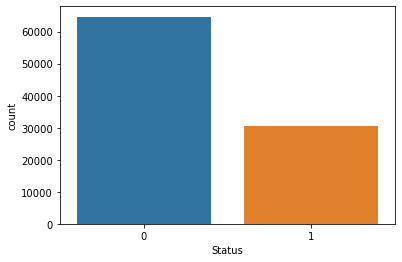

In [30]:
sns.countplot(df['Status'])
plt.show()

> The data seems imbalanced. But, Let's Continue!

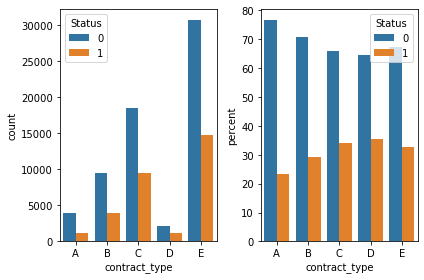

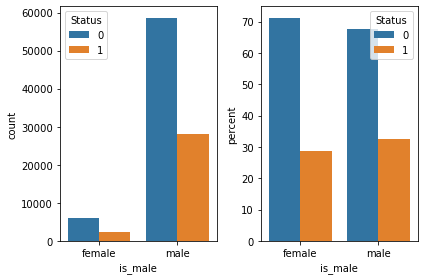

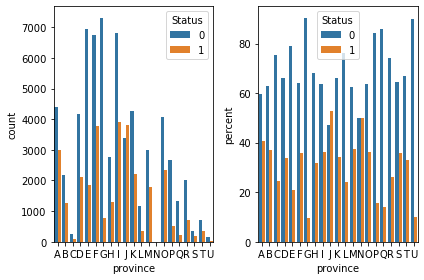

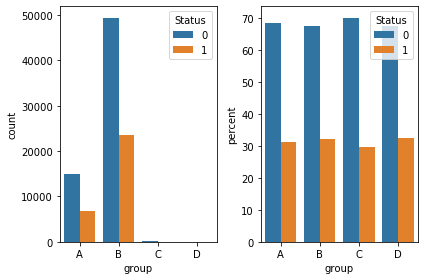

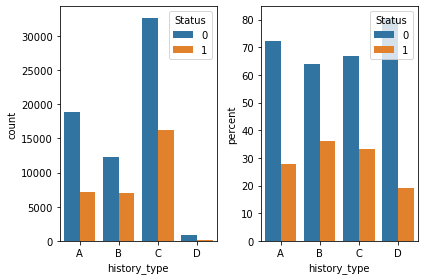

In [31]:
for i in df.select_dtypes(include='O'):
    x, y,hue = i, 'percent', "Status"
    f, axes = plt.subplots(1, 2)
    sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
    prop_df = (df.groupby(x)[hue].value_counts(normalize=True).mul(100).rename(y).reset_index())
    sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
    plt.tight_layout()
    plt.show()

> From the graph above:
- Contract Type E is the most contract type that customer gets
- Most of customers are male
- Province J is only province that default customers are more than not default customers
- Customers Group B is the majority group
- History type C is the majority history type

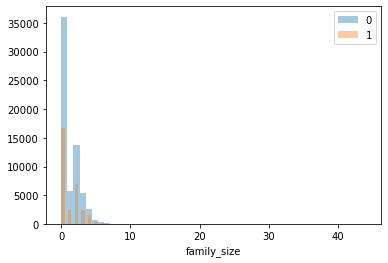

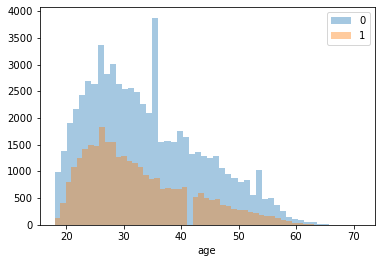

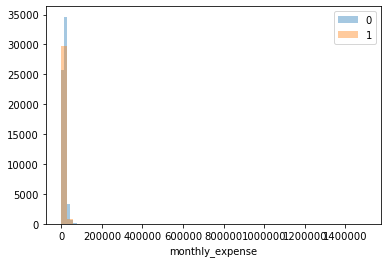

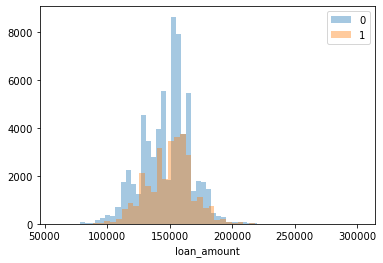

In [32]:
for i in df.select_dtypes(exclude='O').drop(['user_id','birth_date','Status'],axis=1):
    sns.distplot(df[df['Status']==0][i],label='0',kde=False,bins=50)
    sns.distplot(df[df['Status']==1][i],label='1',kde=False,bins=50)
    plt.legend()
    plt.show()

> From the graph above:
- A lot of customers have small family.
- A lot of customers are about 20-35 years old
- Customer whose high expenses seems to be Default customer
- Amount of loan are about 150k 

> Let's take a look at Province J

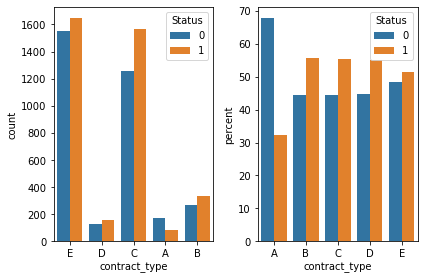

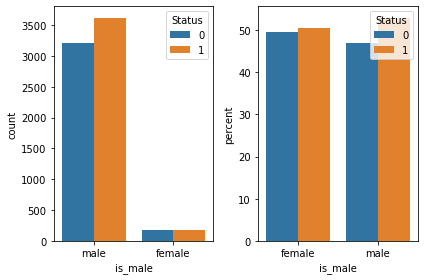

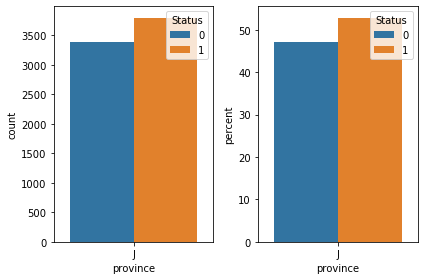

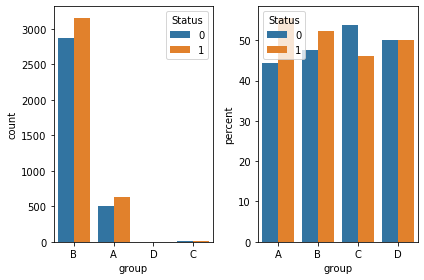

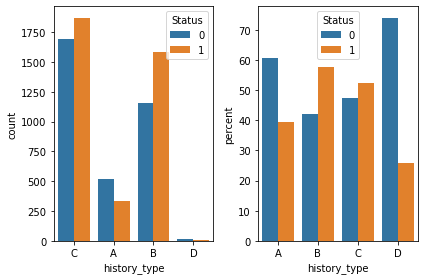

In [33]:
for i in df.select_dtypes(include='O'):
    x, y,hue = i, 'percent', "Status"
    f, axes = plt.subplots(1, 2)
    sns.countplot(x=x, hue=hue, data=df[df['province']=='J'], ax=axes[0])
    prop_df = (df[df['province']=='J'].groupby(x)[hue].value_counts(normalize=True).mul(100).rename(y).reset_index())
    sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
    plt.tight_layout()
    plt.show()

> On Province J, customer with the contract type A and/or history type A and D seems not to be default loaner.

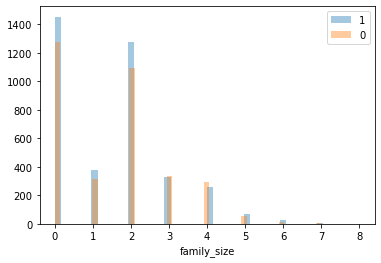

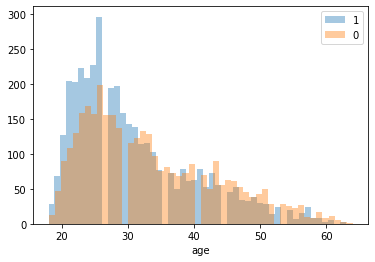

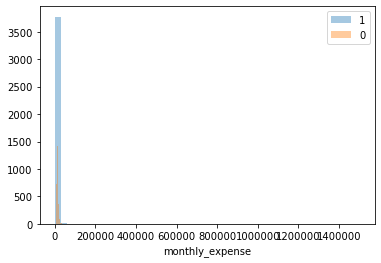

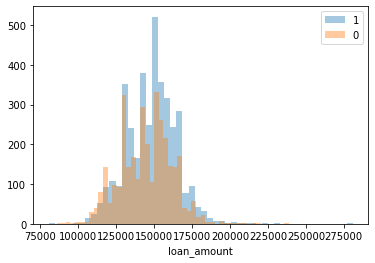

In [34]:
for i in df.select_dtypes(exclude='O').drop(['user_id','birth_date','Status'],axis=1):
    sns.distplot(df[(df['province']=='J')&(df['Status']==1)][i],label='1',kde=False,bins=50)
    sns.distplot(df[(df['province']=='J')&(df['Status']==0)][i],label='0',kde=False,bins=50)
    plt.legend()
    plt.show()

> On Province J, customer whose age less than about 45 seems to be default customer

In [35]:
df[df['province']=='N']

,user_id,family_size,contract_type,birth_date,is_male,province,age,group,history_type,monthly_expense,loan_amount,Status
11144,814429,0.0,B,1987,male,N,25.0,B,C,10500.0,112488,0
11145,825471,0.0,E,1993,male,N,18.0,A,C,10000.0,109941,1


> Province N only got 2 Customers.

## Modelling

> First, Let's Do Feature Engineering with one hot encoding! Drop 'birth_date','user_id', and 'Status'!

In [36]:
df_learn = df.drop(['birth_date','user_id','Status'],axis=1)
df_learn = pd.get_dummies(df_learn,['contract_type','is_male','province','group','history_type'],drop_first=True)

In [37]:
df_learn.head()

,family_size,age,monthly_expense,loan_amount,contract_type_B,contract_type_C,contract_type_D,contract_type_E,is_male_male,province_B,...,province_R,province_S,province_T,province_U,group_B,group_C,group_D,history_type_B,history_type_C,history_type_D
0,0.0,24.0,14500.0,187956,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,30.0,26000.0,170049,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0.0,42.0,30000.0,108378,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0.0,41.0,20000.0,134934,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,34.0,20000.0,166482,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


> Next, Let's import few classification models and modelling libraries!

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score

In [39]:
models = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, 
          KNeighborsClassifier, XGBClassifier]
model_name = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 
              'KNeighborsClassifier', 'XGBClassifier']
X = df_learn
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101)

> To achieve best result, We are using this formula. if  result is 1, meaning that our model results all customers of status 0 are predicted not default and all customers of status 1 are predicted default and will be rejected as customers so that our loan amount 100% is returned by customers without loss. This formula exclude interest. 

$$
\begin{aligned}
 returned = (recall0 * n0 * m0) + ( (1-recall1) * n1 * m1) / loanedmoney
\end{aligned}
$$

> with :
- n0 : number of people on test data with status 0
- n1 : number of people on test data with status 1
- m0 : mean of loan amount
- m1 : how much loan amount returned until month 17th
- loaned_money : sum of loan amount of predicted customer with status 0

> Let's see if ther any differences on loan amount between both status

In [40]:
from scipy.stats import anderson

In [41]:
def normality_anderson_test(categorical_data,numeric_data,dataframe):
    stat = []
    critic = []
    normal = []
    for i in dataframe[categorical_data].unique():
        data = dataframe[dataframe[categorical_data]==i][numeric_data]
        result = anderson(data)
        cv = result.critical_values[2]
        stat.append(result.statistic)
        critic.append(cv)
        if result.statistic < cv:
            normal.append(True)
        else:
            normal.append(False)
    return pd.DataFrame(zip(stat,critic,normal),columns=['Stat','Critical Value','5%'],
                        index=dataframe[categorical_data].unique())

In [42]:
df_dum = X_test.copy()
df_dum['Status'] = y_test
normality_anderson_test('Status','loan_amount',df_dum)

,Stat,Critical Value,5%
1,34.170873,0.787,False
0,76.739084,0.787,False


> Because data seems not normal and there are 2 groups of data. We will use mannwhitneyu with Hypothesis:
 - H0 : There are no differences on Loan Amount based on Status.
 - H1 : There are differences on Loan Amount based on Status.

In [43]:
from scipy.stats import mannwhitneyu

In [44]:
data1 = df_dum[df_dum['Status']==0]['loan_amount']
data2 = data1 = df_dum[df_dum['Status']==1]['loan_amount']
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=28342920.500, p=0.500
Probably the same distribution


> Now, do the modelling!

In [46]:
m0 = round(df_dum['loan_amount'].mean())
m1 = (m0/17)*16
n0 = len(df_dum[df_dum['Status']==0])
n1 = len(df_dum[df_dum['Status']==1])
f1_train = []
f1_test = []
rec_train = []
rec_test = []
returned = []
for item in models:
    model = item()
    model.fit(X_train,y_train)
    f1_train.append(f1_score(y_train,model.predict(X_train),average='weighted'))
    f1_test.append(f1_score(y_test,model.predict(X_test),average='weighted'))
    rec_train.append(recall_score(y_train,model.predict(X_train),average=None)[1])
    rec_test.append(recall_score(y_test,model.predict(X_test),average=None)[1])
    pred = [1 if i > 0.5 else 0 for i in model.predict_proba(X_test)[:, 1]]
    returned.append((((recall_score(y_test,model.predict(X_test),average=None)[0])*n0*m0)+
    ((1-(recall_score(y_test,model.predict(X_test),average=None)[1]))*n1*m1))/((pred.count(0))*m0))
pd.DataFrame(zip(f1_train,rec_train,f1_test,rec_test,returned),columns=['f1_score train','recall_1 train','f1_score test','recall_1 test','returned'],index=model_name)

,f1_score train,recall_1 train,f1_score test,recall_1 test,returned
LogisticRegression,0.547550,0.000000,0.555151,0.000000,0.981389
DecisionTreeClassifier,0.992288,0.977659,0.603038,0.391154,0.983079
RandomForestClassifier,0.992261,0.984744,0.637143,0.278257,0.983276
GradientBoostingClassifier,0.598727,0.090320,0.604329,0.090317,0.982202
KNeighborsClassifier,0.726425,0.430608,0.596742,0.236021,0.981950
XGBClassifier,0.655643,0.206068,0.628389,0.162571,0.982736


> We can see that RandomForestClassifier produces perfectly training f1-score, quite good testing f1-score and highest  returned value. From now on, Let's focus to upgrade the model with RandomForestClassifier.

In [47]:
def output_metric(model):
    print(classification_report(y_test,model.predict(X_test)))
    pred = [1 if i > 0.5 else 0 for i in model.predict_proba(X_test)[:, 1]]
    print('RETURNED VALUE : ',(((recall_score(y_test,model.predict(X_test),average=None)[0])*n0*m0)+
    ((1-(recall_score(y_test,model.predict(X_test),average=None)[1]))*n1*m1))/((pred.count(0))*m0))

In [48]:
rfc = RandomForestClassifier(random_state=101)
rfc.fit(X_train,y_train)
output_metric(rfc)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78     16268
           1       0.45      0.28      0.35      7529

    accuracy                           0.67     23797
   macro avg       0.58      0.56      0.56     23797
weighted avg       0.63      0.67      0.64     23797

RETURNED VALUE :  0.983346959851973


> Try to change threshold based on roc curve

In [49]:
from sklearn.metrics import roc_curve,auc

In [50]:
y_proba = rfc.predict_proba(X_test)
y_proba = y_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
y_pred = [1 if i > best_thresh else 0 for i in y_proba]
print(classification_report(y_test,y_pred))
print('AUC : ',auc(fpr, tpr))
print('RETURNED VALUE : ',(((recall_score(y_test,y_pred,average=None)[0])*n0*m0)+
    ((1-(recall_score(y_test,y_pred,average=None)[1]))*n1*m1))/((y_pred.count(0))*m0))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69     16268
           1       0.41      0.52      0.45      7529

    accuracy                           0.61     23797
   macro avg       0.57      0.58      0.57     23797
weighted avg       0.64      0.61      0.62     23797

AUC :  0.6199284780105893
RETURNED VALUE :  0.9849427684245874


> It's increased and as you can see, this model has increased recall 1 (default) value either. Try to improve with RandomizedSearchCV!

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 30, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
class_weight = [{0:1,1:2},{0:1,1:3}]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'class_weight':class_weight}
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=101), param_distributions = random_grid, 
                               n_iter = 5, cv = 3, verbose=2, random_state=101)

In [53]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True, total=  26.2s
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.1s remaining:    0.0s


[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True, total=  26.3s
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True 
[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True, total=  24.4s
[CV] n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight={0: 1, 1: 3}, bootstrap=True 
[CV]  n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight={0: 1, 1: 3}, bootstrap=True, total=  12.3s
[CV] n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight={0: 1, 1: 3}, bootstrap=True 
[CV]  n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight=

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  8.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [54]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 22,
 'class_weight': {0: 1, 1: 2},
 'bootstrap': True}

In [55]:
rfc1 = RandomForestClassifier(random_state=101,max_depth=22,n_estimators=1000,min_samples_split=10,min_samples_leaf=1,
                            max_features='sqrt',bootstrap=True,class_weight={0:1,1:2})
rfc1.fit(X_train,y_train)
output_metric(rfc1)

              precision    recall  f1-score   support

           0       0.76      0.66      0.71     16268
           1       0.43      0.56      0.49      7529

    accuracy                           0.63     23797
   macro avg       0.60      0.61      0.60     23797
weighted avg       0.66      0.63      0.64     23797

RETURNED VALUE :  0.9860811344686337


> Try again to change threshold!

In [56]:
y_proba1 = rfc1.predict_proba(X_test)
y_proba1 = y_proba1[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_proba1)
J1 = tpr1 - fpr1
ix1 = np.argmax(J1)
best_thresh1 = thresholds1[ix1]
y_pred1 = [1 if i > best_thresh1 else 0 for i in y_proba1]
print(classification_report(y_test,y_pred1))
print('AUC : ',auc(fpr1, tpr1))
print('RETURNED VALUE : ',(((recall_score(y_test,y_pred1,average=None)[0])*n0*m0)+
    ((1-(recall_score(y_test,y_pred1,average=None)[1]))*n1*m1))/((y_pred1.count(0))*m0))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65     16268
           1       0.41      0.67      0.51      7529

    accuracy                           0.59     23797
   macro avg       0.60      0.61      0.58     23797
weighted avg       0.67      0.59      0.61     23797

AUC :  0.6588684641172565
RETURNED VALUE :  0.9873116775148529


> It's improved!

> Since our data is quite imbalanced, Let's do oversampling with SMOTE!

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
f1_train_sm = []
f1_test_sm = []
rec_train_sm = []
rec_test_sm = []
returned_sm = []
sm = SMOTE(random_state=101)
X_sm, y_sm = sm.fit_sample(X_train,y_train)
for item in models:
    model = item()
    model.fit(X_sm, y_sm)
    f1_train_sm.append(f1_score(y_train,model.predict(X_train),average='weighted'))
    f1_test_sm.append(f1_score(y_test,model.predict(X_test),average='weighted'))
    rec_train_sm.append(recall_score(y_train,model.predict(X_train),average=None)[1])
    rec_test_sm.append(recall_score(y_test,model.predict(X_test),average=None)[1])
    pred_sm = [1 if i > 0.5 else 0 for i in model.predict_proba(X_test)[:, 1]]
    returned_sm.append((((recall_score(y_test,model.predict(X_test),average=None)[0])*n0*m0)+
    ((1-(recall_score(y_test,model.predict(X_test),average=None)[1]))*n1*m1))/((pred_sm.count(0))*m0))
pd.DataFrame(zip(f1_train_sm,rec_train_sm,f1_test_sm,rec_test_sm,returned_sm),columns=['f1_score train','recall_1 train','f1_score test','recall_1 test','benefit'],index=model_name)

,f1_score train,recall_1 train,f1_score test,recall_1 test,benefit
LogisticRegression,0.379470,0.809232,0.378132,0.807013,0.983139
DecisionTreeClassifier,0.992164,0.978224,0.596914,0.398991,0.982965
RandomForestClassifier,0.992027,0.986352,0.637185,0.350113,0.983719
GradientBoostingClassifier,0.636788,0.375929,0.640385,0.378005,0.984026
KNeighborsClassifier,0.727729,0.777024,0.545262,0.491566,0.982297
XGBClassifier,0.671274,0.320989,0.645150,0.275203,0.983473


> Benefit value drops, but RandomForestClassifier once again has the best f1-score for training and quite good f1-score for testing. Let's improve it!

In [59]:
rfc2 = RandomForestClassifier(random_state=101)
rfc2.fit(X_sm, y_sm)
output_metric(rfc2)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     16268
           1       0.43      0.36      0.39      7529

    accuracy                           0.65     23797
   macro avg       0.58      0.57      0.57     23797
weighted avg       0.63      0.65      0.64     23797

RETURNED VALUE :  0.9837702829668217


In [60]:
y_proba_sm = rfc2.predict_proba(X_test)
y_proba_sm = y_proba_sm[:, 1]
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_proba_sm)
J_sm = tpr_sm - fpr_sm
ix_sm = np.argmax(J_sm)
best_thresh_sm = thresholds_sm[ix_sm]
y_pred_sm = [1 if i > best_thresh_sm else 0 for i in y_proba_sm]
print(classification_report(y_test,y_pred_sm))
print('AUC : ',auc(fpr_sm, tpr_sm))
print('RETURNED VALUE : ',((((recall_score(y_test,y_pred_sm,average=None)[0])*n0*m0)+
    ((1-(recall_score(y_test,y_pred_sm,average=None)[1]))*n1*m1))/((y_pred_sm.count(0))*m0)))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61     16268
           1       0.38      0.65      0.48      7529

    accuracy                           0.55     23797
   macro avg       0.57      0.58      0.55     23797
weighted avg       0.64      0.55      0.57     23797

AUC :  0.6148741381697188
RETURNED VALUE :  0.985790303719518


In [61]:
rf_random.fit(X_sm, y_sm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True, total=  35.2s
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.1s remaining:    0.0s


[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True, total=  35.5s
[CV] n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True 
[CV]  n_estimators=550, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, class_weight={0: 1, 1: 3}, bootstrap=True, total=  35.6s
[CV] n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight={0: 1, 1: 3}, bootstrap=True 
[CV]  n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight={0: 1, 1: 3}, bootstrap=True, total=  18.0s
[CV] n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight={0: 1, 1: 3}, bootstrap=True 
[CV]  n_estimators=325, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=16, class_weight=

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 13.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [62]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 22,
 'class_weight': {0: 1, 1: 2},
 'bootstrap': True}

In [63]:
rfc3 = RandomForestClassifier(random_state=101,max_depth=22,n_estimators=1000,min_samples_split=10,min_samples_leaf=1,
                            max_features='sqrt',bootstrap=True,class_weight={0:1,1:2})
rfc3.fit(X_sm,y_sm)
output_metric(rfc3)

              precision    recall  f1-score   support

           0       0.79      0.53      0.63     16268
           1       0.40      0.70      0.51      7529

    accuracy                           0.58     23797
   macro avg       0.60      0.61      0.57     23797
weighted avg       0.67      0.58      0.59     23797

RETURNED VALUE :  0.9875510347931227


In [64]:
y_proba_sm1 = rfc3.predict_proba(X_test)
y_proba_sm1 = y_proba_sm1[:, 1]
fpr_sm1, tpr_sm1, thresholds_sm1 = roc_curve(y_test, y_proba_sm1)
J_sm1 = tpr_sm1 - fpr_sm1
ix_sm1 = np.argmax(J_sm1)
best_thresh_sm1 = thresholds_sm1[ix_sm1]
y_pred_sm1 = [1 if i > best_thresh_sm1 else 0 for i in y_proba_sm1]
print(classification_report(y_test,y_pred_sm1))
print('AUC : ',auc(fpr_sm1, tpr_sm1))
print('RETURNED VALUE : ',((((recall_score(y_test,y_pred_sm1,average=None)[0])*n0*m0)+
    ((1-(recall_score(y_test,y_pred_sm1,average=None)[1]))*n1*m1))/((y_pred_sm1.count(0))*m0)))

              precision    recall  f1-score   support

           0       0.80      0.50      0.61     16268
           1       0.40      0.72      0.52      7529

    accuracy                           0.57     23797
   macro avg       0.60      0.61      0.56     23797
weighted avg       0.67      0.57      0.58     23797

AUC :  0.6533368899986196
RETURNED VALUE :  0.9879819181710864


In [65]:
best_thresh_sm1

0.4862625792905006

> I think we have found best metrics that produces return value = 0.987

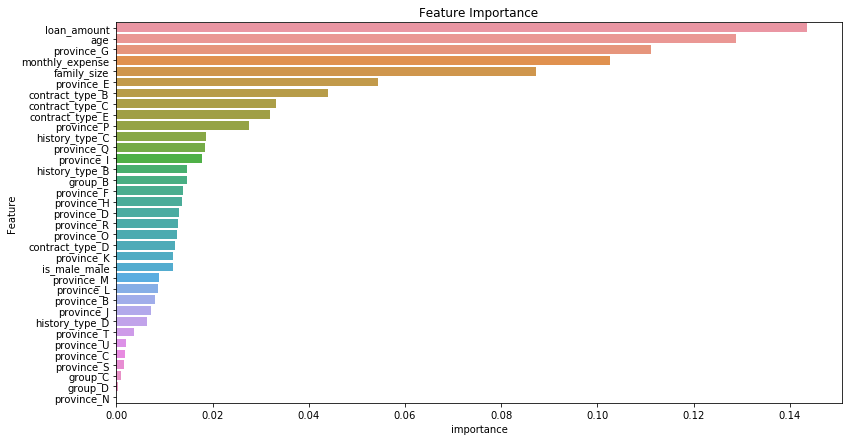

In [66]:
plt.figure(figsize=(13,7))
importance = pd.DataFrame(rfc3.feature_importances_, columns=['importance'])
importance['Feature'] = X.columns
sns.barplot(data=importance.sort_values(by=['importance'],ascending=False),x='importance',y='Feature')
plt.title('Feature Importance')
plt.show()

> From the graph above loan amount, age, monthly expense, family size, and province seems to be top important features

## Statistic Test

> Let's do a little statistic test to loan amount

In [67]:
df_stat = df.drop(['Status'],axis=1)
df_stat

,user_id,family_size,contract_type,birth_date,is_male,province,age,group,history_type,monthly_expense,loan_amount
0,821302,0.0,A,1987,female,A,24.0,A,A,14500.0,187956
1,821429,0.0,B,1982,male,A,30.0,B,B,26000.0,170049
2,821637,0.0,C,1969,male,A,42.0,B,B,30000.0,108378
3,827397,0.0,D,1970,female,A,41.0,B,B,20000.0,134934
4,827555,0.0,D,1977,male,A,34.0,B,B,20000.0,166482
...,...,...,...,...,...,...,...,...,...,...,...
95183,956634,3.0,E,1981,male,T,30.0,B,A,20000.0,128235
95184,956641,2.0,B,1980,male,T,32.0,B,A,15000.0,143730
95185,956643,1.0,B,1985,male,T,27.0,B,C,12000.0,152187
95186,956644,0.0,E,1980,male,T,32.0,B,C,20000.0,151545


> First, Try to see loan amount with gender

In [68]:
normality_anderson_test('is_male','loan_amount',df_stat)

,Stat,Critical Value,5%
female,45.316149,0.787,False
male,406.381959,0.787,False


> Because data seems not normal and there are 2 groups of data. We will use mannwhitneyu with Hypothesis:
 - H0 : There are no differences on Loan Amount based on Gender.
 - H1 : There are differences on Loan Amount based on Gender.

In [69]:
data1 = df_stat[df_stat['is_male']=='male']['loan_amount']
data2 = data1 = df_stat[df_stat['is_male']=='female']['loan_amount']
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=35036820.500, p=0.500
Probably the same distribution


> So, we fails to reject H0.

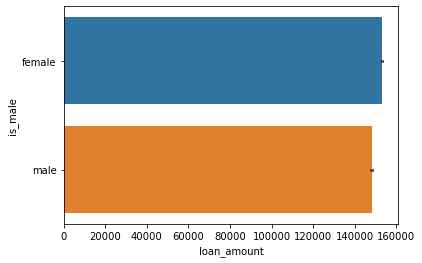

In [70]:
sns.barplot(x='loan_amount',y='is_male',data=df_stat)
plt.show()

> Second, Let's See loan amount based on generation. From 'birth_date' columns, create new columns called 'Generations' whom filled by Millenials (birth year : 1981-1994) or Gen X (birth year : 1965-1980)

In [71]:
df_stat['Generation'] = df_stat['birth_date'].apply(lambda x : 'Millenials' if 1981 <= x <=1994 else 'Gen X')

In [72]:
normality_anderson_test('Generation','loan_amount',df_stat)

,Stat,Critical Value,5%
Millenials,210.753201,0.787,False
Gen X,235.242051,0.787,False


> Because data seems not normal and there are 2 groups of data. We will use mannwhitneyu with Hypotesis:
 - H0 : There are no differences on Loan Amount based on Generation.
 - H1 : There are differences on Loan Amount based on Generation.

In [73]:
data1 = df_stat[df_stat['Generation']=='Millenials']['loan_amount']
data2 = data1 = df_stat[df_stat['Generation']=='Gen X']['loan_amount']
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1139553800.000, p=0.500
Probably the same distribution


> So, we fails to reject H0.

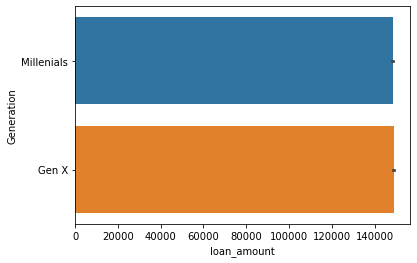

In [74]:
sns.barplot(x='loan_amount',y='Generation',data=df_stat)
plt.show()

> Third, Try to look loan amount based on province.

In [75]:
normality_anderson_test('province','loan_amount',df_stat)

,Stat,Critical Value,5%
A,18.565622,0.787,False
B,22.819918,0.786,False
C,1.088447,0.778,False
D,48.948224,0.786,False
E,66.462222,0.787,False
F,59.862141,0.787,False
G,54.110767,0.787,False
H,23.856050,0.786,False
I,132.255523,0.787,False
J,22.298854,0.787,False


>Because data seems not normal and there are more than 2 groups of data. We will use mannwhitneyu with kruskal and significance level = 0.05:
- H0 : There are no differences on Loan Amount based on Province.
- H1 : There are differences on Loan Amount based on Province.

In [76]:
from pingouin import kruskal

In [77]:
kruskal(data=df_stat, dv='loan_amount', between='province')

,Source,ddof1,H,p-unc
Kruskal,province,20,15541.082,0.0


> p-unc < 0.05 which means we rejects H0.

C:\Users\Alvin\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


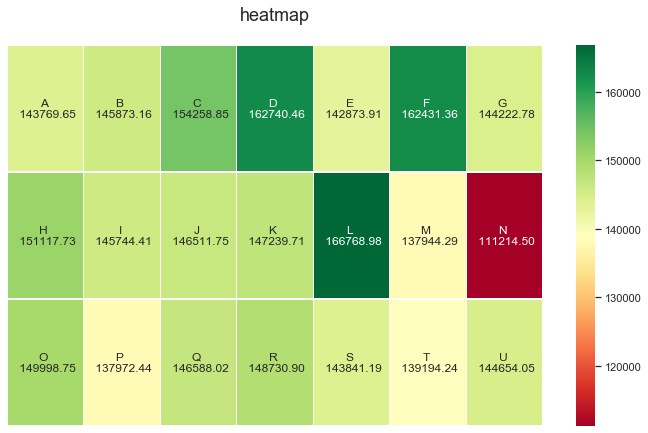

In [78]:
df_province = df_stat.groupby(by='province').describe()['loan_amount']['mean']
df_province = pd.DataFrame(zip(df_province.index,df_province.values),
                           columns=['province','loan_amount'])
df_province['Yrows'] = [1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3]
df_province['Xcols'] = [1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7]
province = ((np.asarray(df_province['province'])).reshape(3,7))
loan = ((np.asarray(df_province['loan_amount'])).reshape(3,7))
result = df_province.pivot(index='Yrows',columns='Xcols',values='loan_amount')
labels = (np.asarray(["{0} \n {1:.2f}".format(i,j) for i,j in zip(province.flatten(),loan.flatten())])).reshape(3,7)

fig,ax = plt.subplots(figsize=(12,7))
title='heatmap'
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

sns.heatmap(result, annot=labels,fmt='',cmap='RdYlGn',linewidths=0.3,ax=ax)
plt.show()

<b>Conclussion :</b>
- I assume The best model we found is good enough to predict loan default that results return value approximately 1.
- The company should add interest about 2%.
- The company need to upgraded loan market on Province D, F, L because they are produced high amount of loan.
- The company also need to expand market to Province G because they are most no default customer province and big ratio of no default customer. 
- On Province J, they need to campaign to people who older than 45 and/or has typical for contract type A or history type A
- Start Massive Campign on Province N

## Dashboard Preparation

In [79]:
import pickle

In [80]:
filename = 'finalized_model.sav'
pickle.dump(rfc3, open(filename, 'wb'))

In [81]:
filename = 'dummies_column.sav'
pickle.dump(df_learn.columns, open(filename , 'wb'))

In [82]:
filename = 'real_column.sav'
pickle.dump(df.drop(['user_id','birth_date','Status'],axis=1).columns, open(filename , 'wb'))

In [83]:
df_clean = df.drop(['birth_date'],axis=1)
df_clean['family_size'] = df_clean['family_size'].astype(int)
df_clean['age'] = df_clean['age'].astype(int)
df_clean['monthly_expense'] = df_clean['monthly_expense'].astype(int)
df_clean['loan_amount'] = df_clean['loan_amount'].astype(int)
df_clean['Status'] = df['Status'].apply(lambda x : 'Not Default' if x == 0 else 'Default')
df_clean.columns= ['User Id','Family Size','Contract Type','Sex','Province','Age','Group','History Type','Monthly Expense',
                   'Loan Amount','Status']
df_clean.to_csv('clean.csv', index=False)